# **Laboratorio 3 Apreendizaje Estadistico**

Por: Nicolas Osorno Roa

In [1]:
#@title 1. Crear DataFrame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dframe = pd.DataFrame({'X':[0,1,2,3,4,5],'Y':[0,1,2,3,4,5]})
dframe


,X,Y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


In [2]:
#@title 2. Crear funcion de Coste (con metrica euclidiana)

def f_coste(X,Y,t0,t1):
  J=0
  m=len(X)
  for i in range(m):
    J = J + (t0+X[i]*t1 - Y[i])**2
  return J/(2*m)

Text(0.5, 1.0, 'Función de Coste - $\\theta_1$')

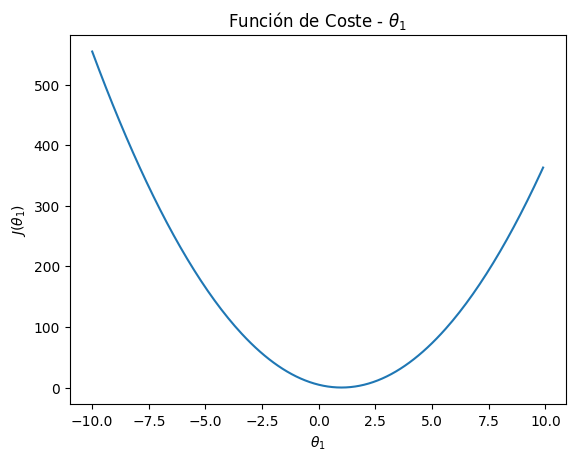

In [3]:
#@title 3. Grafica funcion de Coste respecto a $\theta_1$


list_t1 = np.arange(-10,10,0.1)
f_costet1 = lambda x: f_coste(list(dframe['X']), list(dframe['Y']),0,x)

plt.plot(list_t1,f_costet1(list_t1))
plt.xlabel("$\\theta_1$")
plt.ylabel('$J(\\theta_1)$')
plt.title("Función de Coste - $\\theta_1$")


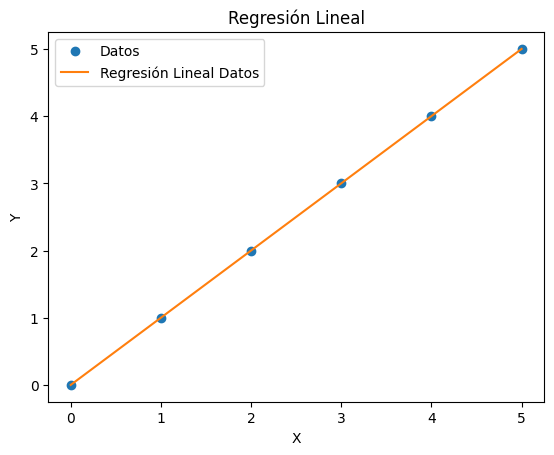

In [4]:
#@title 3. minimizacion funcion de Coste respecto a $\theta_1$ y grafica regresion obtenida

from scipy.optimize import minimize

x_min = minimize(f_costet1, 1 ).x[0]

h = lambda x: x*x_min

plt.plot(dframe['X'], dframe['Y'], 'o', label='Datos')
plt.plot(dframe['X'], h(dframe['X']), label='Regresión Lineal Datos')
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

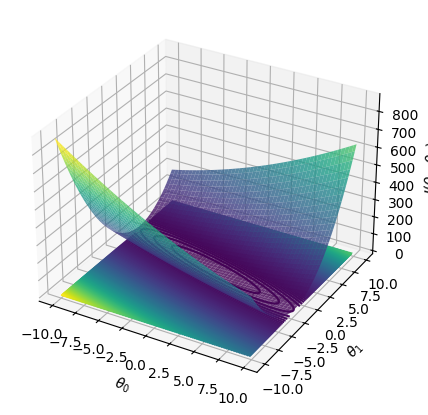

In [5]:
#@title 4. Grafica funcion de Coste respecto a $\theta_1$ y $\theta_0$

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


list_t1 = np.arange(-10,10,0.1)
list_t0 = np.arange(-10,10,0.1)
np.meshgrid(list_t0,list_t1)

f_costet1t0 = lambda x,y: f_coste(list(dframe['X']), list(dframe['Y']),x,y)
Mt0, Mt1 = np.meshgrid(list_t0,list_t1)
Jt0t1 = f_costet1t0(Mt0, Mt1)


fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Mt0, Mt1, Jt0t1, cmap='viridis', alpha=0.8)
ax.contour(Mt0, Mt1, Jt0t1, 200, linestyles="solid", offset=Jt0t1.min(), cmap='viridis')

ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("$J(\\theta_0, \\theta_1)$")

plt.show()




# 5. Expresion Teorica Para la funcion de coste 1D y 2D

Sabemos que para metrica euclidiana la forma genral de la funcion de coste es:


$J=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2 $

Caso 1D:

$h(\theta_1) = \theta_1 x$

Sustituyendo en J.

$J(\theta)=\frac{1}{2m} \sum_{i=0}^m (\theta_1 x^{(i)} -y^{(i)})^2 $

Es la ecucion de una parabola, es justamente que se obtuvo graficamente en el punto 3.

Caso 2D:

$h(\theta_1, \theta_0) = \theta_0 + \theta_1 x$

Sustituyendo en J.

$J(\theta)=\frac{1}{2m} \sum_{i=0}^m (\theta_0 + \theta_1 x^{(i)} -y^{(i)})^2 $

De nuevo la ecuacion es cuadratica, pero ahora en dos dimenciones, ahora la grafica seria de un paraboloide, coincide con la grafica obtenida en 4.

In [6]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.8 MB/s eta 0:00:00


In [13]:
#@title 6. Metodo Gradiente Descendiente para hallar mínimo de funcion 1D

import random as rd
import numdifftools as nd

def grad_des_1D(df,alpha,error,a,b):
  wi = rd.uniform(a, b)
  while abs(df(wi))>error:
    wi = wi - alpha*df(wi)
  return wi

f = lambda x: (x-4)**2
df = nd.Derivative(f)

for i in range(3):
  alpha = np.round(rd.random(),3 )
  min = grad_des_1D(df,alpha,10**(-4),-10,10)
  print(f'El minimo con $\alpha =${alpha} es: ',np.round(min, 6))

El minimo con $lpha =$0.783 es:  4.000048
El minimo con $lpha =$0.211 es:  3.999956
El minimo con $lpha =$0.081 es:  3.999953


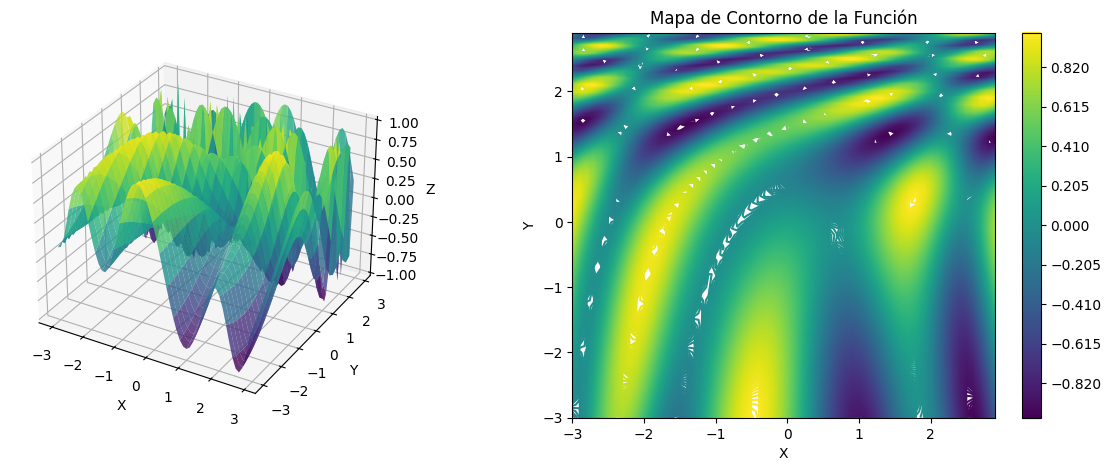

In [14]:
#@title 7. Graficos para visulizar la funcion 2D

F = lambda x: np.sin((x[0]**2)/2 + (x[1]*2)/4 + 3)*np.cos(2*x[0] + 1 - np.exp(x[1]))

x = np.arange(-3,3,0.1)
y = np.arange(-3,3,0.1)

MX, MY = np.meshgrid(x,y)
MZ = F([MX, MY])

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1, projection='3d')
ax2 = fig.add_subplot(1,2,2)

ax1.plot_surface(MX, MY, MZ, cmap='viridis', alpha=0.8)
ax2.set_title("Superficie de la Función")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

im2 = ax2.contour(MX, MY, MZ, 400, linestyles="solid", cmap='viridis')
ax2.set_title("Mapa de Contorno de la Función")
fig.colorbar( im2, ax=ax2, orientation='vertical')
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

plt.show()

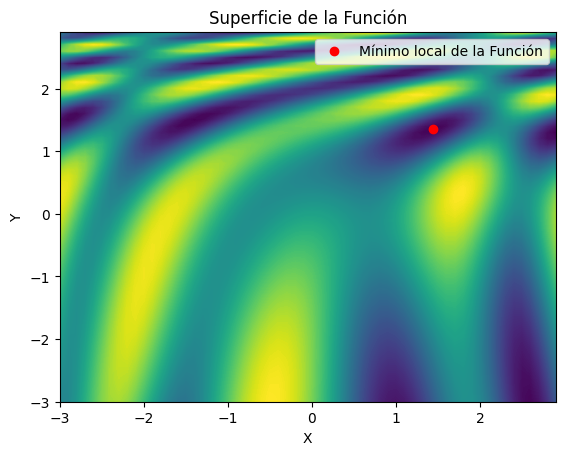

In [18]:
 #@title 7. Metodo Gradiente Descendiente para hallar minimo de la funcion 2D


def grad_des_ND(Gradf,alpha,a,b,N):
  wi = np.array([rd.uniform(a,b) ,rd.uniform(a,b)])
  for i in range(N):
    wi = wi - alpha*Gradf(wi)
  return wi

GradF = nd.Gradient(F)
minF = grad_des_ND(GradF,0.1,-1,1,1000)

plt.contourf(MX, MY, MZ, 200, linestyles="solid", cmap='viridis')

plt.plot(minF[0],minF[1],'o', color='red', label = 'Mínimo local de la Función')
plt.title("Superficie de la Función")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

plt.show()



Text(0, 0.5, 'Y')

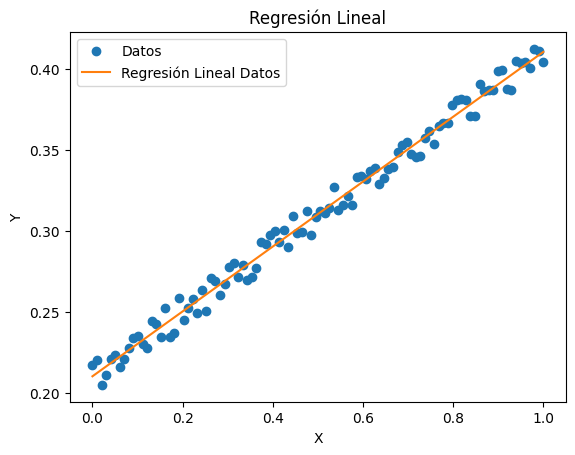

In [19]:
#@title 8. Hallar Regresion lineal de los Datos Usando Gradiente Descendente

X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

J = lambda t: f_coste(X,y, t[0], t[1])
h = lambda t: t[0] + t[1]*X

GradJ = nd.Gradient(J)

minJ = grad_des_ND(GradJ,0.1,-1,1,1000)

plt.plot(X, y, 'o', label='Datos')
plt.plot(X, h(minJ), label='Regresión Lineal Datos')
plt.title('Regresión Lineal')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')


In [20]:
#@title 9. Comparacion resultado con  la libreria linearRegresion() de sklearn.

from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

print("Resulatado Pendiente:", minJ[1],", Resultado Intercepto:", minJ[0])
print("Sklearn Pendiente:", model.coef_[0],", Sklearn Intercepto:", model.intercept_)

Resulatado Pendiente: 0.20000723256312375 , Resultado Intercepto: 0.21027348041542454
Sklearn Pendiente: 0.20027636214686131 , Sklearn Intercepto: 0.21012924465693744
